# Gym membersexercise tracking

Набор данных содержит подробную информацию о тренировочных режимах, физических характеристиках и фитнес-метриках членов тренажерного зала. В нем представлено 973 записи, каждая из которых включает 15 переменных, таких как возраст, пол, вес, рост, максимальная и средняя частота сердечных сокращений, количество часов тренировок, сожженные калории, тип тренировки, процент жира, содержание воды в организме, количество тренировочных дней в неделю, уровень подготовки и индекс массы тела (BMI).

In [1]:
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


dataset_name = "gym_members_exercise_tracking.csv"
path = kagglehub.dataset_download("valakhorasani/gym-members-exercise-dataset") + "/" + dataset_name
df = pd.read_csv(path)
df.head()


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


## Анализ датасета и добавление нового признака

Данный датасет может решать задачи определения типа тренировки, по параметрам нагрузки человека и параметрам самого человека. Если взять workout_type за целевое значени, то можно решать задачи классификации. Удалим это значение для работы с кластеризацией. При помощи k-means попробуем получить количество кластеров равное количеству типов тренировок.

In [2]:
df = df.drop('Workout_Type', axis=1)

## Добавим новое значение
В качестве нового признака можно добавить признак "Workout_Intensity", который будет вычисляться на основе показателей максимального параметра частоты сердечного ритма во время тренировки и частоты ритма во время отдыха.


In [3]:
df['Workout_Intensity'] = df['Max_BPM'] / df['Resting_BPM']
df.head(100)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Intensity
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,3.000000
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,2.712121
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,3.092593
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,3.392857
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,2.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,59,Female,54.6,1.57,164,169,64,0.58,441.0,29.2,2.3,3,1,22.15,2.562500
96,56,Male,129.0,1.78,194,126,64,1.29,805.0,27.1,2.7,2,1,40.71,3.031250
97,58,Male,103.5,1.66,172,168,61,1.33,1106.0,24.6,3.1,3,1,37.56,2.819672
98,45,Female,59.4,1.51,169,142,65,1.15,735.0,33.1,1.9,4,2,26.05,2.600000


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [5]:
df.head(100)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Intensity
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20,3.000000
1,46,0,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00,2.712121
2,32,0,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71,3.092593
3,25,1,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41,3.392857
4,38,1,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39,2.764706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,59,0,54.6,1.57,164,169,64,0.58,441.0,29.2,2.3,3,1,22.15,2.562500
96,56,1,129.0,1.78,194,126,64,1.29,805.0,27.1,2.7,2,1,40.71,3.031250
97,58,1,103.5,1.66,172,168,61,1.33,1106.0,24.6,3.1,3,1,37.56,2.819672
98,45,0,59.4,1.51,169,142,65,1.15,735.0,33.1,1.9,4,2,26.05,2.600000


# Проверим пустые значения

In [6]:
df.isnull().sum()

Age                              0
Gender                           0
Weight (kg)                      0
Height (m)                       0
Max_BPM                          0
Avg_BPM                          0
Resting_BPM                      0
Session_Duration (hours)         0
Calories_Burned                  0
Fat_Percentage                   0
Water_Intake (liters)            0
Workout_Frequency (days/week)    0
Experience_Level                 0
BMI                              0
Workout_Intensity                0
dtype: int64

Отсутвующих значений нет



# Попробуем найти очевидные выбросы

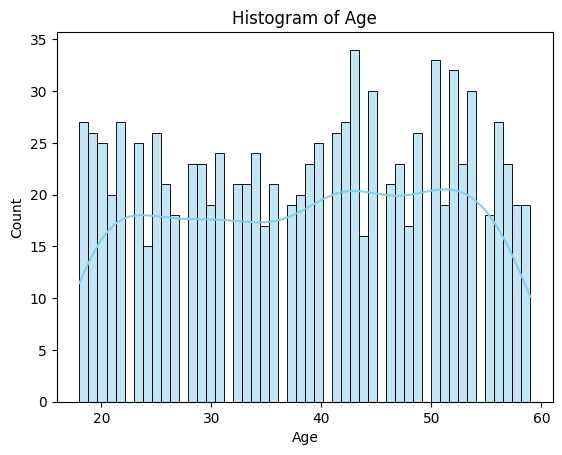

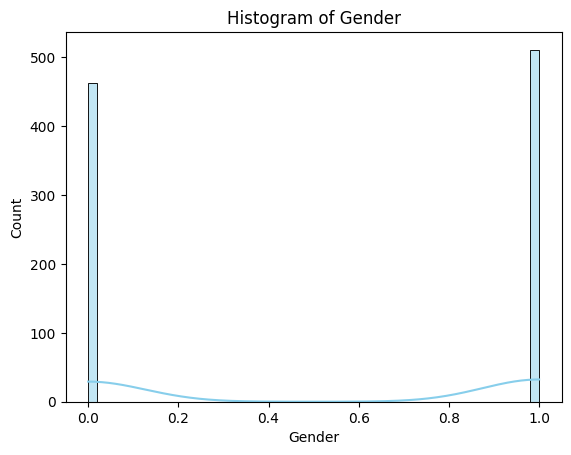

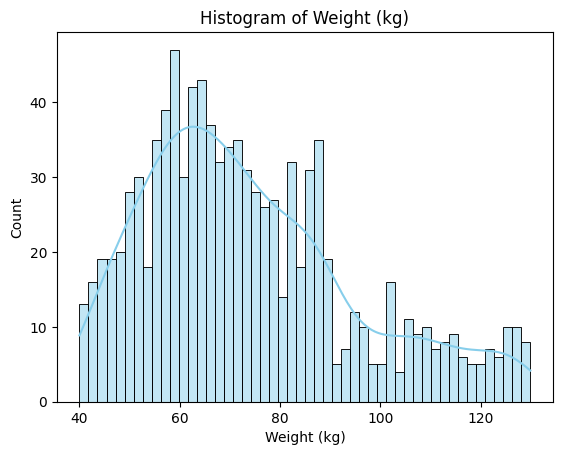

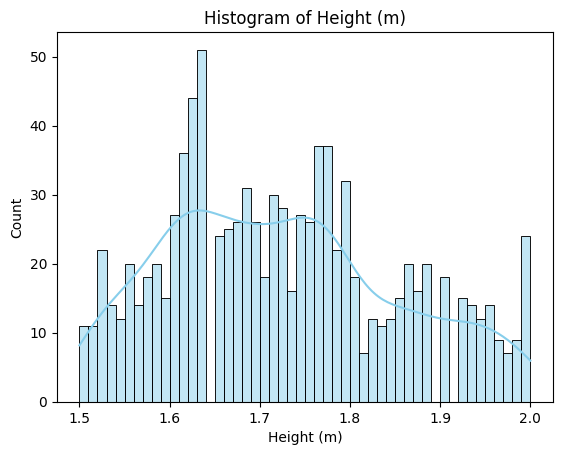

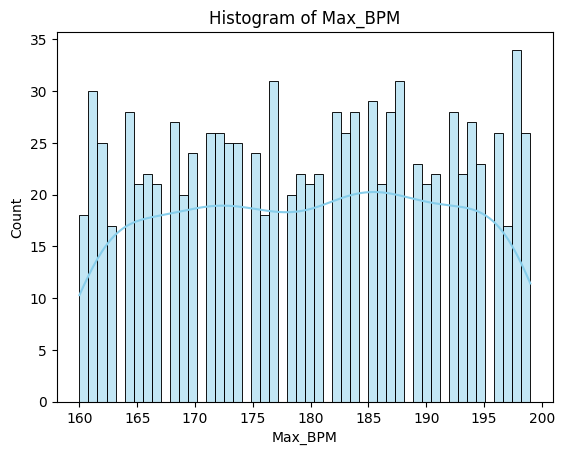

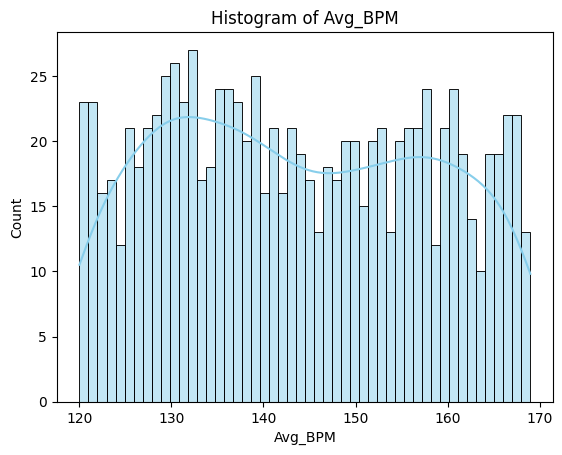

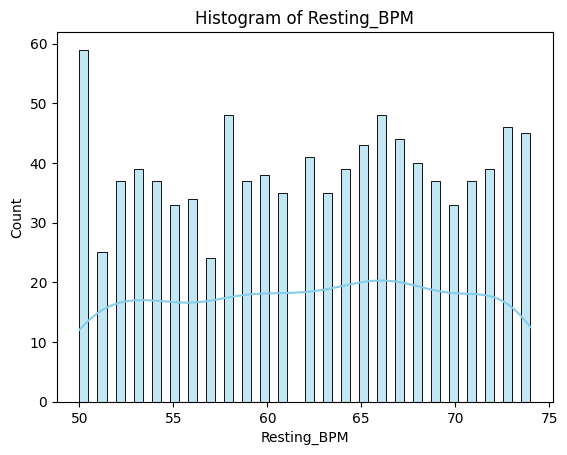

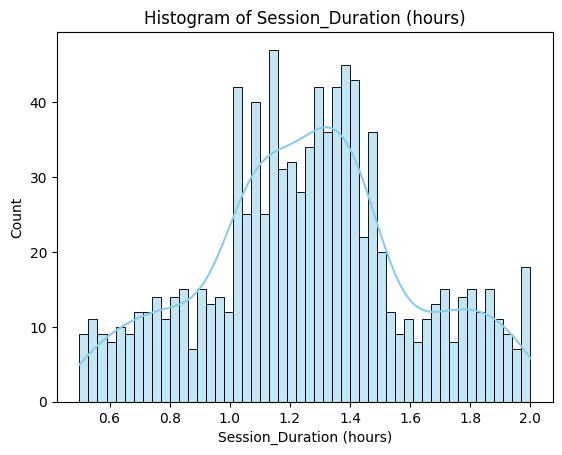

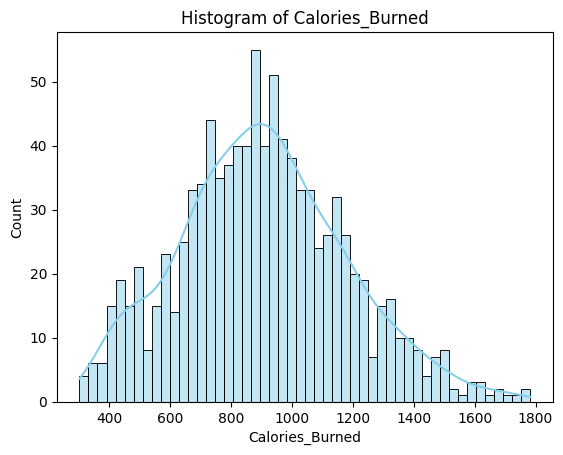

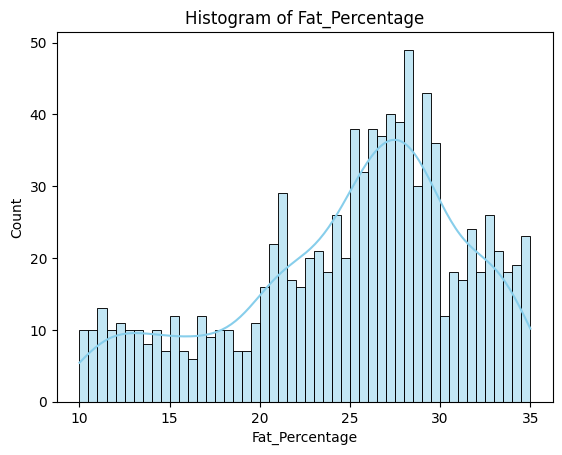

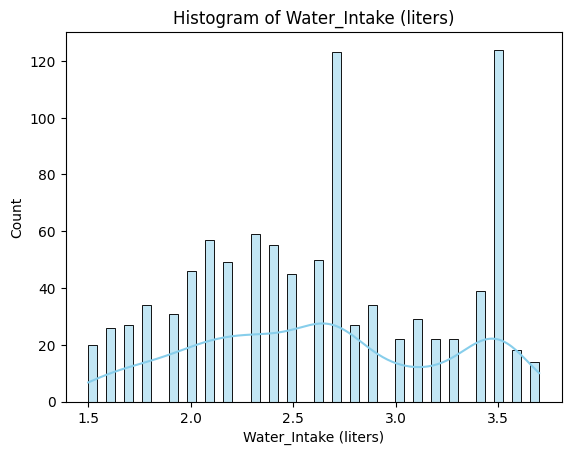

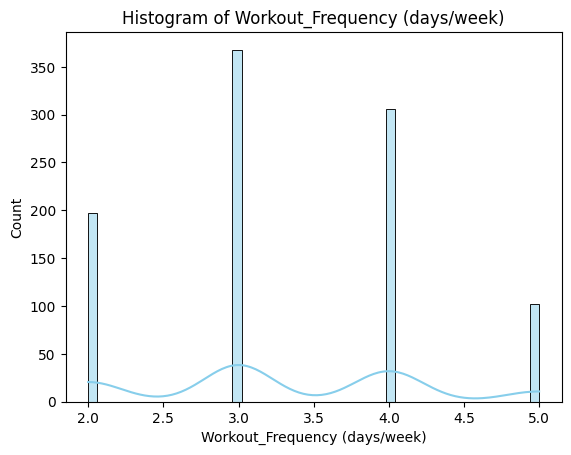

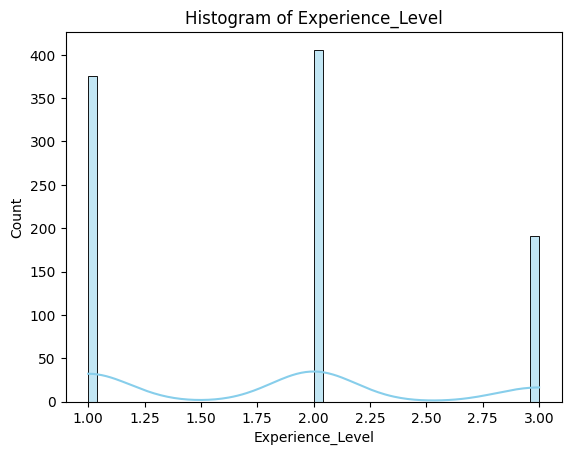

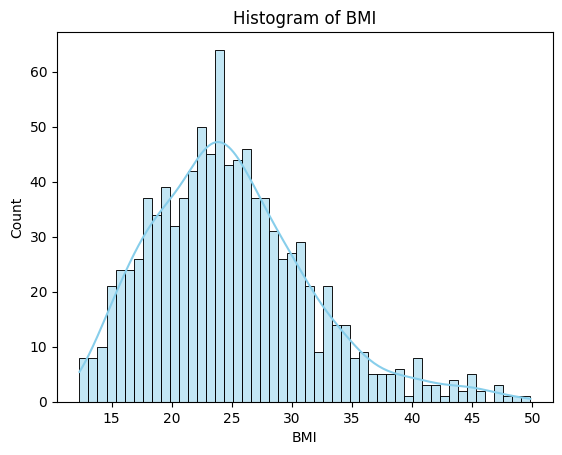

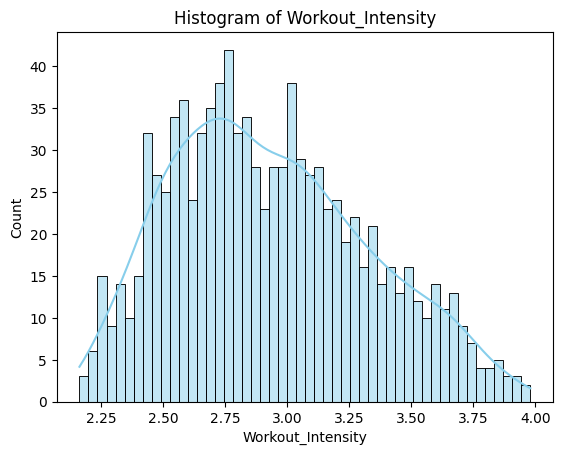

In [7]:
for label in df.columns:
    sns.histplot(df[label], bins=50, kde=True, color="skyblue")
    plt.xlabel(label)
    plt.title(f'Histogram of {label}')
    plt.show()

Проверим выбросы при помощи boxplot

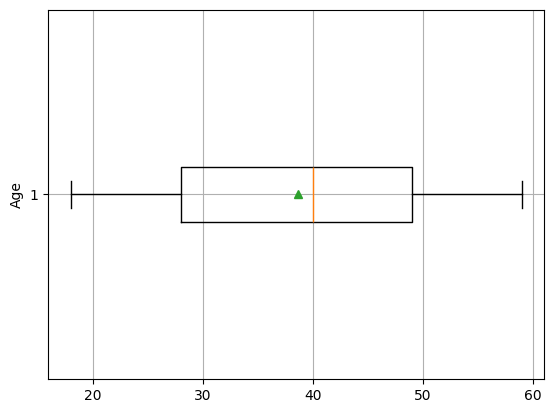

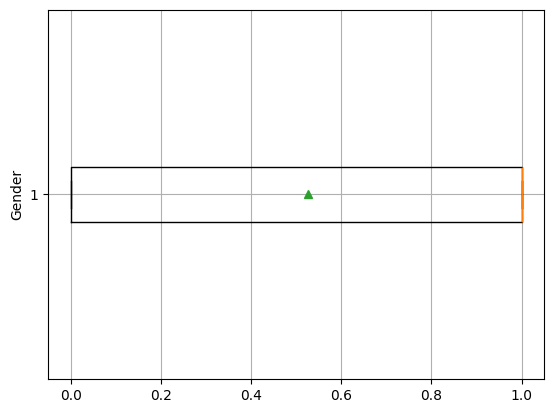

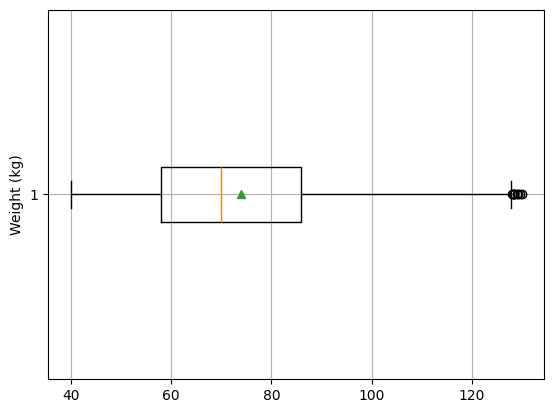

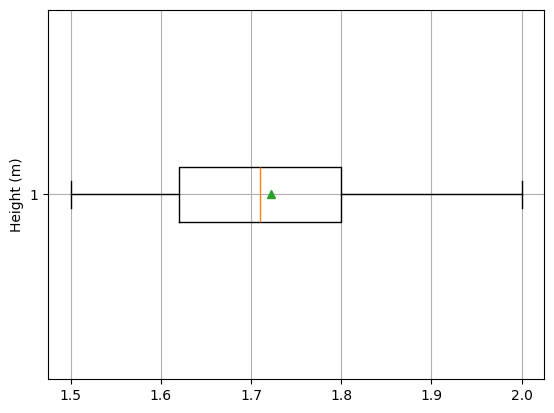

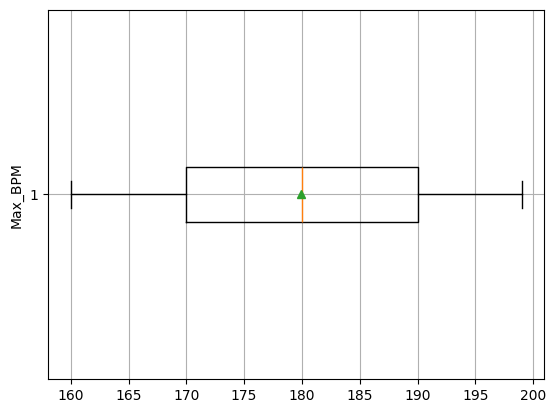

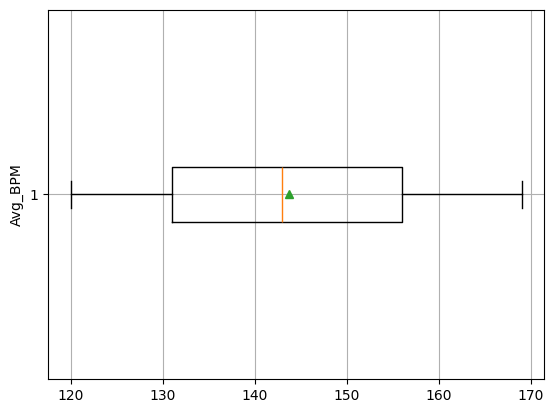

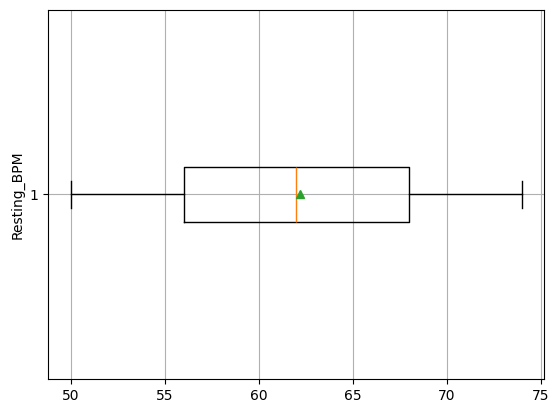

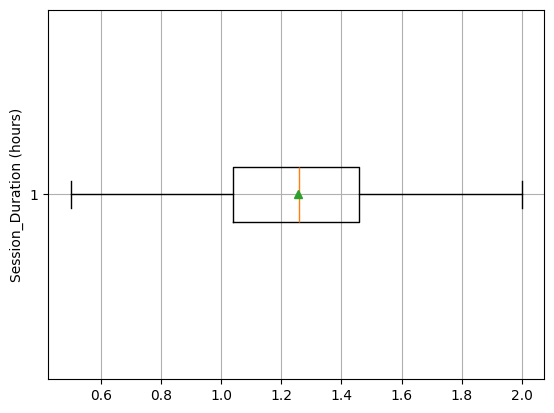

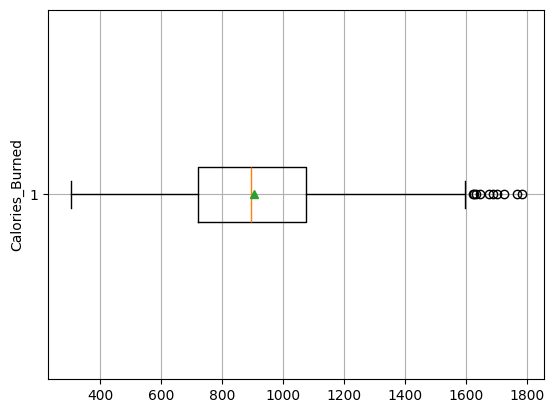

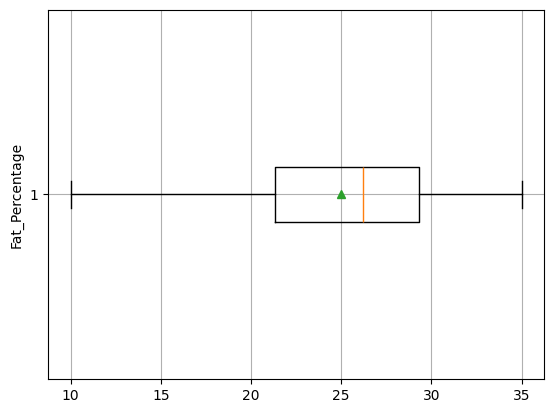

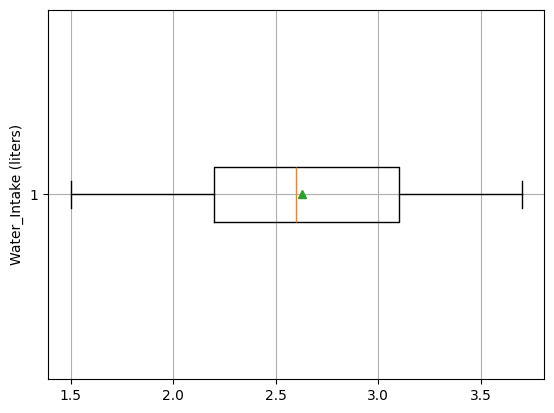

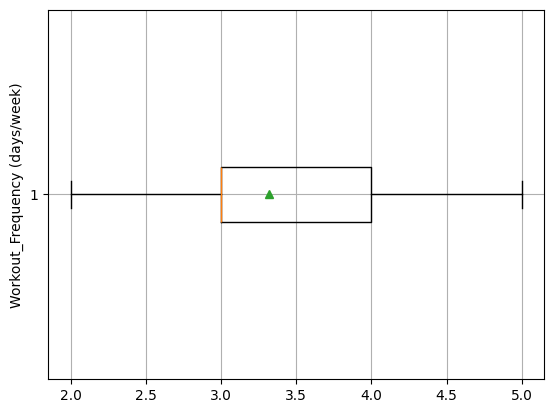

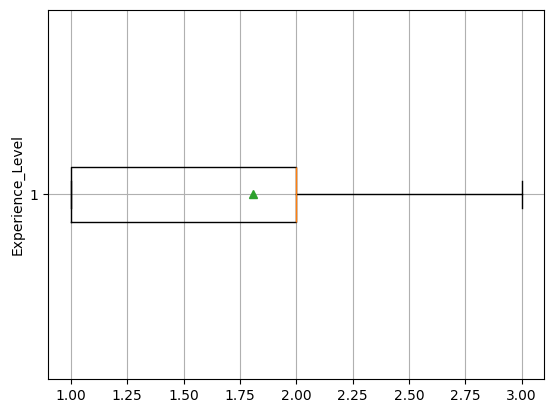

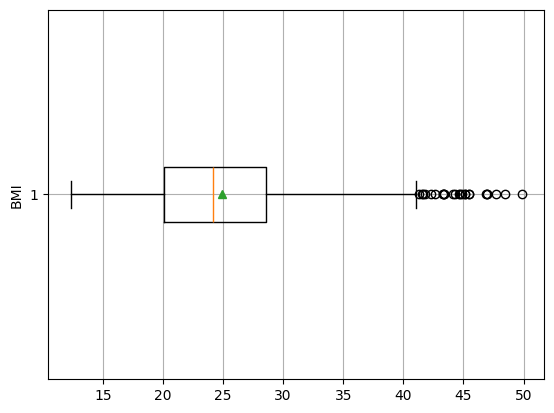

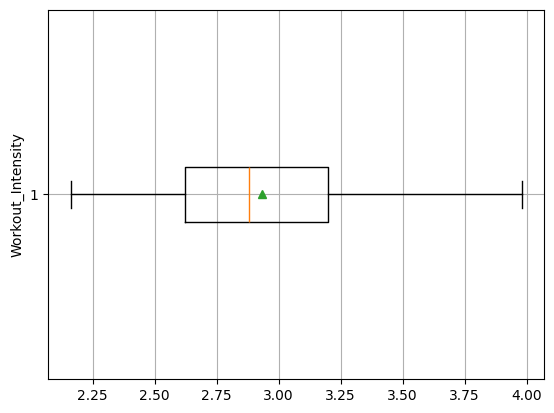

In [8]:
for column in df.columns:
    plt.boxplot(df[column], showmeans=True, vert=False)
    plt.ylabel(column)
    plt.grid()
    plt.show()


## Удаление выбросов

In [9]:
for column in df.columns:
    first_quantile = df[column].quantile(0.25)
    third_quantile = df[column].quantile(0.75)
    iqr = (third_quantile - first_quantile)
    delta = iqr * 1.5
    lower_threshold = first_quantile - delta
    upper_threshold = third_quantile + delta
    df = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]

# Стандартизация

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
standardized_data = scaler.fit_transform(df)
df = pd.DataFrame(standardized_data, columns=df.columns)

In [13]:
df.head(10)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Intensity
0,1.419723,0.990379,0.832920,-0.103497,0.008689,0.948726,-0.295231,1.282767,1.577783,-2.013600,1.479839,0.749842,1.617739,1.022724,0.163806
1,0.594447,-1.009714,0.145693,-1.504463,-0.078296,0.528990,0.520780,0.134331,-0.058795,1.407550,-0.852191,0.749842,0.264536,1.332428,-0.559734
2,-0.560939,-1.009714,-0.203049,-0.492654,-1.122118,-1.499733,-1.111242,-0.425164,-0.842829,1.327241,-0.519044,0.749842,0.264536,0.078125,0.396523
3,-1.138632,0.990379,-0.967204,-0.181328,0.878541,1.438418,-0.839238,-1.956413,-1.394698,0.588401,-0.852191,-0.346081,-1.088667,-1.005841,1.151193
4,-0.065774,0.990379,-1.331332,0.519155,0.704570,1.018682,0.792784,-1.809178,-1.303355,0.652648,0.313824,-0.346081,-1.088667,-1.697515,-0.427570
5,1.419723,-1.009714,-0.721033,-0.336991,-1.035133,0.878770,1.608795,0.988296,0.828002,-1.547810,0.147250,1.845764,1.617739,-0.637637,-1.670259
6,-0.230829,0.990379,-0.090221,-0.025665,-0.513222,1.788198,1.472793,0.693825,1.851814,-0.616229,-0.519044,-0.346081,0.264536,-0.085330,-1.385518
7,0.099281,-1.009714,-0.120992,-1.660126,0.791556,-0.170569,0.248777,0.045989,-0.013123,0.877512,-1.185338,-0.346081,0.264536,1.086385,0.045993
8,-0.891050,0.990379,2.545858,1.686627,0.443615,-1.149953,-1.383245,-0.660741,-0.682978,0.604463,-0.019323,0.749842,0.264536,1.390928,1.565481
9,-0.891050,0.990379,1.525275,0.908312,-0.948148,-0.520349,0.248777,-0.513505,-0.344244,0.732957,0.147250,-0.346081,-1.088667,1.000356,-0.739428


<Axes: >

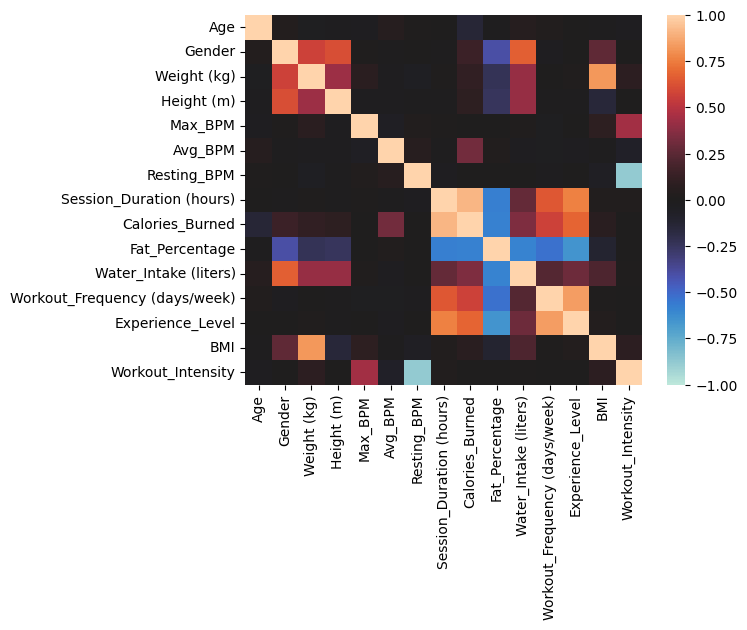

In [14]:
correlation_matrix = df.corr()
correlation_matrix.head()
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, center= 0)

*Видно, что большинство признаков не имеют линейной зависимости*

# Кластеризация
Так как визуально невозможно определить кол-во кластеров, используем метод локтя. Также можно использовать методы понижения размерностей для выявления кол-ва кластеров визуально

# Понижение размерности для визуализации кластеров

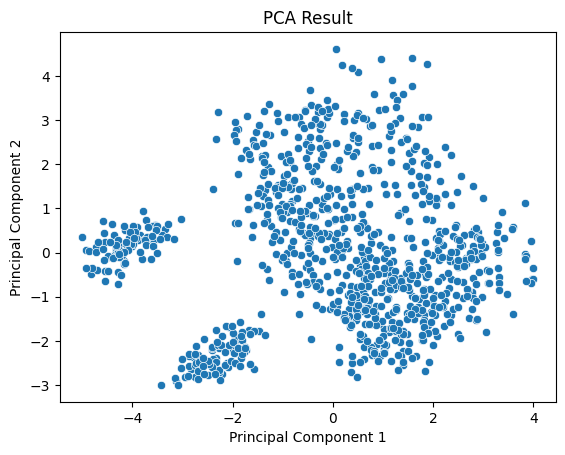

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df)
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])
sns.scatterplot(x='PCA1', y='PCA2', data=pca_df)
plt.title('PCA Result')
plt.xlabel('Principal Component 1')

plt.ylabel('Principal Component 2')
plt.show()

# Пробуем t-SNE

Попробуем использовать нелинейное понижение размерности

In [16]:
from sklearn.manifold import TSNE

In [17]:
tsne = TSNE(n_components=2, perplexity=5)

In [18]:
tsne_data = tsne.fit_transform(df)

In [19]:
sne_df = pd.DataFrame(tsne_data, columns=['SNE1', 'SNE2'])

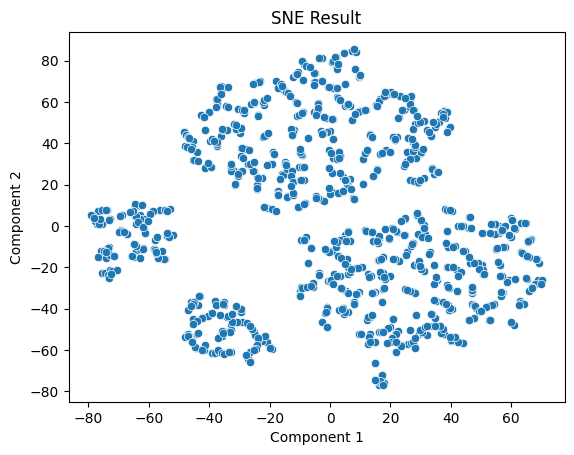

In [20]:
sns.scatterplot(x='SNE1', y='SNE2', data=sne_df)
plt.title('SNE Result')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.show()

Визуально можно выделить **4** кластера

# Метод локтя

In [21]:
objects = df.values

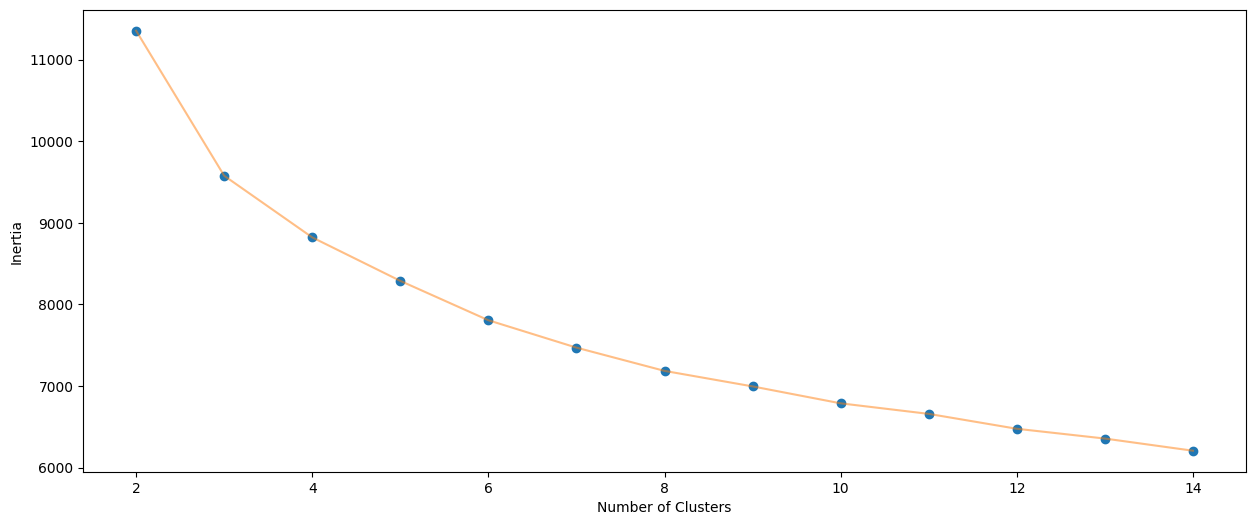

In [22]:
from sklearn.cluster import KMeans
import numpy as np
inertia = []
for num_of_clusters in range(2, 15): # перебираем размер кластеров от 2х до 14
    algorithm = (KMeans(n_clusters = num_of_clusters ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111, algorithm='elkan'))
    algorithm.fit(objects)
    inertia.append(algorithm.inertia_)
    
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 15) , inertia , 'o') 
plt.plot(np.arange(2 , 15) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

# Применим силуэтный анализ

In [23]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avgs = []
for num_of_clusters in range(2, 15):
    
    # intialise kmeans
    algorithm = (KMeans(n_clusters = num_of_clusters ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111, algorithm='elkan'))
    algorithm.fit(objects)
    
    cluster_labels = algorithm.labels_
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_avgs.append(silhouette_avg)


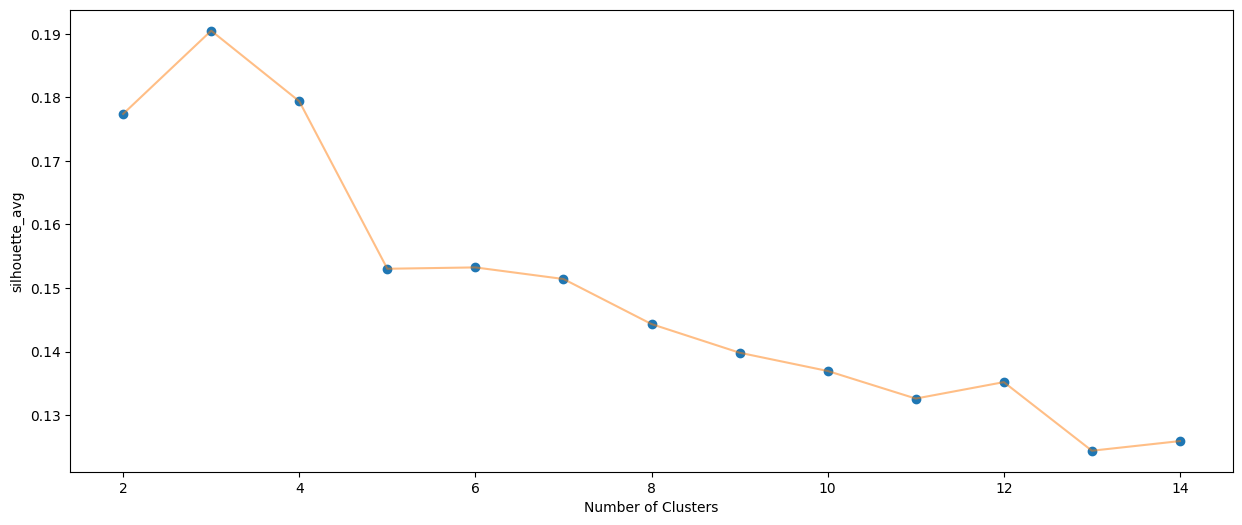

In [24]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(2 , 15) , silhouette_avgs , 'o') 
plt.plot(np.arange(2 , 15) , silhouette_avgs, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('silhouette_avg')
plt.show()

Основываясь на всех методах выбора размера кластера, возьмем значение **5**

In [25]:
number_of_clusters = 5 

In [26]:


algorithm = (KMeans(n_clusters = number_of_clusters ,init='k-means++', n_init = 10 ,max_iter=300, 
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(objects)
labels = algorithm.labels_
centroids = algorithm.cluster_centers_

df['cluster'] = labels

In [27]:
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI,Workout_Intensity,cluster
0,1.419723,0.990379,0.832920,-0.103497,0.008689,0.948726,-0.295231,1.282767,1.577783,-2.013600,1.479839,0.749842,1.617739,1.022724,0.163806,2
1,0.594447,-1.009714,0.145693,-1.504463,-0.078296,0.528990,0.520780,0.134331,-0.058795,1.407550,-0.852191,0.749842,0.264536,1.332428,-0.559734,0
2,-0.560939,-1.009714,-0.203049,-0.492654,-1.122118,-1.499733,-1.111242,-0.425164,-0.842829,1.327241,-0.519044,0.749842,0.264536,0.078125,0.396523,1
3,-1.138632,0.990379,-0.967204,-0.181328,0.878541,1.438418,-0.839238,-1.956413,-1.394698,0.588401,-0.852191,-0.346081,-1.088667,-1.005841,1.151193,1
4,-0.065774,0.990379,-1.331332,0.519155,0.704570,1.018682,0.792784,-1.809178,-1.303355,0.652648,0.313824,-0.346081,-1.088667,-1.697515,-0.427570,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,-1.221160,0.990379,0.771377,0.129998,0.617585,1.018682,0.656782,0.929402,1.771888,-2.431205,1.479839,0.749842,1.617739,0.776680,-0.361371,2
927,-1.138632,0.990379,-0.279977,-0.881811,0.356630,1.578330,-0.839238,0.369907,1.376065,-0.021945,0.646971,-1.442003,-1.088667,0.246742,0.881905,3
928,1.667305,-1.009714,-0.597948,0.285661,1.226481,-1.639645,-1.247244,1.371109,0.116281,-1.017772,0.147250,1.845764,1.617739,-0.818298,1.823564,2
929,-0.560939,0.990379,2.786900,0.830481,1.574422,0.179211,-0.023227,-0.454611,-0.058795,0.492031,-0.852191,-0.346081,0.264536,2.320041,0.650260,4


# Визуализация кластеры, используя только 3 признака

In [28]:
import plotly.graph_objs as go
import plotly.offline as py

py.init_notebook_mode(connected=True)

# Убедимся, что cluster числовой
df['cluster'] = df['cluster'].astype('category').cat.codes

trace1 = go.Scatter3d(
    x=df['Age'],
    y=df['Avg_BPM'],
    z=df['Calories_Burned'],
    mode='markers',
    marker=dict(
        color=df['cluster'], 
        size=2,
        line=dict(
            color=df['cluster'],
            width=6
        ),
        opacity=0.8
    )
)

data = [trace1]
layout = go.Layout(
    title='Clusters',
    scene=dict(
        xaxis=dict(
            title='Age',
            dtick=50,          
            tickfont=dict(
                size=1      
            )
        ),
        yaxis=dict(
            title='Avg_BPM',
            dtick=50,           
            tickfont=dict(
                size=1     
            )
        ),
        zaxis=dict(
            title='Calories_Burned',
            dtick=50,           
            tickfont=dict(
                size=10     
            )
        )
    )
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig)


# Визуализация кластеры, используя только 2 признака

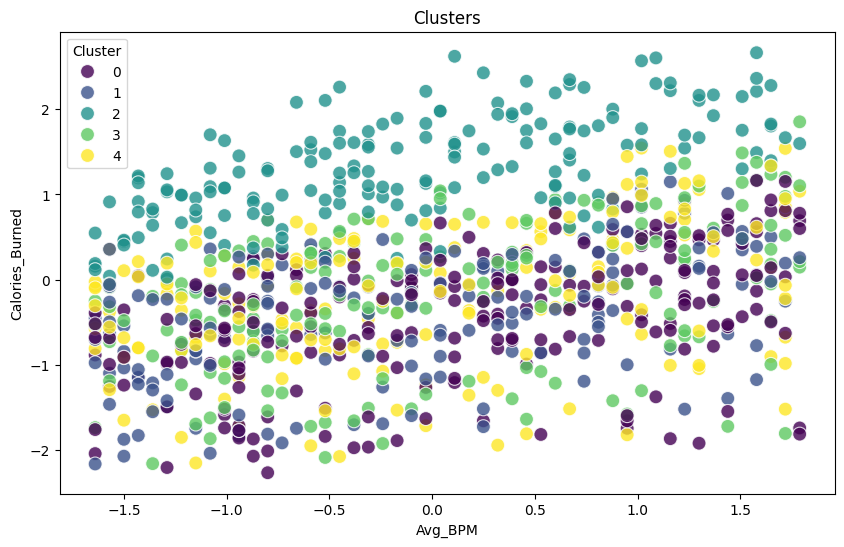

In [29]:

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Avg_BPM',                
    y='Calories_Burned',        
    hue='cluster',              
    palette='viridis',          
    s=100,                      
    alpha=0.8                   
)

plt.title('Clusters')
plt.xlabel('Avg_BPM')
plt.ylabel('Calories_Burned')
plt.legend(title='Cluster') 
plt.show()


# Визуализация с понижением размерности до 2 t-SNE

In [30]:
df_sne = df.iloc[:, :-1]

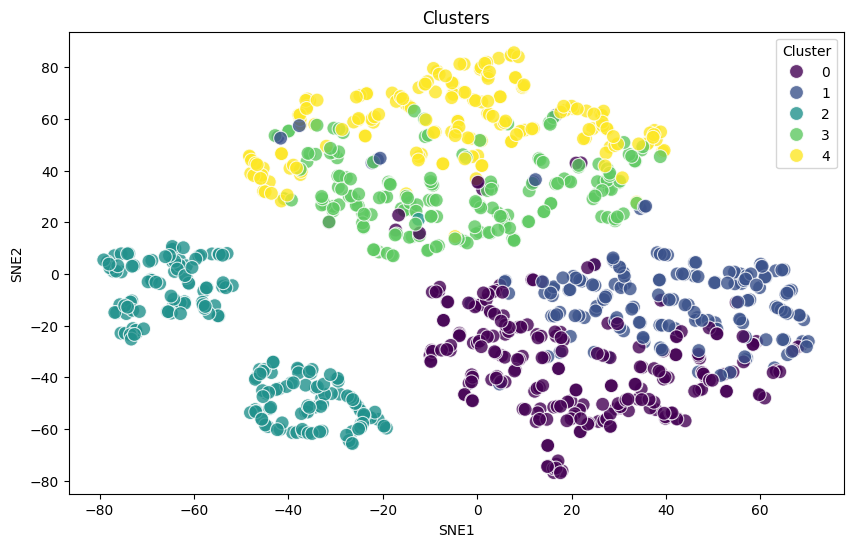

In [31]:
tsne = TSNE(n_components=2, perplexity=5)
tsne_data = tsne.fit_transform(df_sne)
sne_df = pd.DataFrame(tsne_data, columns=['SNE1', 'SNE2'])
sne_df['cluster'] = df['cluster']
# sns.scatterplot(x='SNE1', y='SNE2', data=sne_df)
# plt.title('SNE Result')
# plt.xlabel('Component 1')
# plt.ylabel('Component 2')
# plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sne_df,
    x='SNE1',                
    y='SNE2',        
    hue='cluster',              
    palette='viridis',          
    s=100,                      
    alpha=0.8                   
)

plt.title('Clusters')
plt.xlabel('SNE1')
plt.ylabel('SNE2')
plt.legend(title='Cluster') 
plt.show()

# Вывод

В ходе работы был обработан датасет, проверен на наличие пропусков, из набора были удалены выбросы. Для решения задачи кластеризации был применен метод K-means, оптимальное количество кластеров было выбрано при помощи анализа методом локтя и силуэтного анализа. В ходе работы были использованы линейные и нелинейные методы понижения размерностей, что позволило визуализировать кластеры. В итоге, на основе данных было выявлено 5 кластеров, которые можно отнести к разным видам тренировок.